# Book Recommendation Project

## Import Data and Packages

In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
## Books dataset contains 10,000 books and info about them including author, year(the most recent are from 2017), and avg. rating
books = pd.read_csv("books.csv")
books = books.drop(columns= ['isbn', 'isbn13', 'image_url', 'small_image_url', 'work_id'])
print("Books:")
print(books.shape)
display(books.head())

## Tags dataset contains 34,252 tag names
tags = pd.read_csv('tags.csv')
print("Tags:")
print(tags.shape)
display(tags.head())

## Book_tags dataset contains 999,912 tags related to books.  There are about 100 tags per each of the 10,000 books
book_tags = pd.read_csv('book_tags.csv')
print("Book_Tags:")
print(book_tags.shape)
display(book_tags.head())

## To_read dataset contains 912,705 books users want to read
to_read = pd.read_csv('to_read.csv')
print("To_Read:")
print(to_read.shape)
display(to_read.head())

## Ratings dataset contains 5,976,479 ratings from 53,424 users for the 10,000 books
ratings = pd.read_csv('ratings.csv')
print("Ratings:")
print(ratings.shape)
display(ratings.head())

Books:
(10000, 18)


,book_id,goodreads_book_id,best_book_id,books_count,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
0,1,2767052,2767052,272,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317
1,2,3,3,491,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543
2,3,41865,41865,226,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439
3,4,2657,2657,487,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267
4,5,4671,4671,1356,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718


Tags:
(34252, 2)


,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


Book_Tags:
(999912, 3)


,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


To_Read:
(912705, 2)


,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


Ratings:
(5976479, 3)


,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [3]:
book_file = pd.read_csv("book_file.csv")
book_file = book_file[book_file.rating.notna()]
print(book_file.shape)
ratings = ratings.append(book_file)
print(ratings.shape)

(174, 3)
(5976653, 3)


## Preprocess Data

In [4]:
## Get appropriate tags ##

## Read in genres file:
book_genres = pd.read_csv('book_genres.csv', header = None) #common book genres
book_genres = np.asarray(book_genres[0])
book_genres = [i.lower() for i in book_genres]
#print(book_genres)

## Find all tag names in dataset:
tag_names = tags.tag_name.unique()

## Create Dictionary of tags to their respective genres
all_tags = {}
for i in book_genres:
    all_tags[i] = []
#print(all_tags)
#tags[(tags.tag_name.str.contains('\W+art|_+art|^art')) & (tags.genre == 'art')]
pattern = re.compile(r'\W+art|_+art|^art')

for i in book_genres:
    for x in tag_names:
        if i == 'fiction' and 'non' in x: #make sure nonfiction books aren't put into fiction
            continue
        elif i == 'art' and re.search(pattern, x) is not None:
            all_tags[i].append(x)
        elif i == 'art' and re.search(pattern, x) is None:
            continue
        elif i in x:
            all_tags[i].append(x)
#print(all_tags.keys())

# Check:
#print(all_tags['fitness'])
#for i in tag_names:
#    if 'fitness' in i:
#        print(i)
#print("Previous Tags Names:")
#print(tags.tag_name.head())

## Keep Only Tags with names like those in common genres, take out meaningless ones like the number ones
to_keep_tags = [i for i in all_tags.values()]
good_tags = []
for i in range(len(tags.tag_name)):
    for x in to_keep_tags:
        if tags.tag_name.iloc[i] in x:
            good_tags.append(tags.iloc[i])
        else:
            continue
#print(len(good_tags))
tags = pd.DataFrame(good_tags) #now only 5463 tags

## Label Tags by Genre
def get_key(val):
    for key, value in all_tags.items():
        if val in value:
            return key
final_tags = []
for i in range(len(tags.tag_name)):
    final_tags.append(get_key(tags.tag_name.iloc[i]))
final_tags = np.asarray(final_tags)
tags['genre'] = final_tags ## add genre column to tags dataset

In [5]:
## Number of Tags in Each Genre:
tags_count = tags.groupby(by=['genre']).count()
# genres with the least books: dictionary (1), coming-of-age (2), and encyclopedia and textbook (3)
# genres with the most books: art (433), fiction (395), fantasy (324), and manga (322) 
#tags[tags.tag_name.str.contains('\W+art|_+art|^art)]
print("Number of Tags in Each Genre:")
genre_count = tags_count.sort_values('tag_id', ascending = False)
print(genre_count['tag_id'].head())
genre_dict = {}
for k,v in zip(list(genre_count.index), genre_count.tag_id):
    genre_dict[k] = v
#print(genre_dict)

Number of Tags in Each Genre:
genre
art        433
fiction    395
fantasy    324
manga      322
cook       257
Name: tag_id, dtype: int64


In [5]:
## Possible reduced ratings to only keep the favorable ratings:

#reduced_ratings = ratings[ratings.rating >= 3]
#reduced_ratings.shape
#ratings = reduced_ratings

In [6]:
## Goodreads Book Id and Best Book ID are the same except for these 241 cases:
print("Count of different goodreads and best_book ids:")
print(len(books[books.goodreads_book_id != books.best_book_id]))

## All of the books except for these 186 are in english
print("Count of books not in english:")
print(len(books[books.language_code.str.find("en") == -1]))

## Take out non-english books:
not_eng = books[books.language_code.str.find("en") == -1]
na_books = books[books.language_code.isnull()] #1,084 books with NAN language
books = books[(books.language_code.str.contains("en") == 1) | (books.language_code.isnull())]

## Take out books with few user ratings:
print("Number of books before taking out those with few ratings:")
print(books.shape)
#display(books.head())
books = books[books.ratings_count > 15000]  ## took out books with few reviews

## Only Keep English Books:
eng_book_id = books['book_id']
#print(len(eng_book_id))
eng_good_id = books['goodreads_book_id']
#print(len(eng_good_id))
print("Number of books after taking out those with few ratings:")
print(books.shape)


Count of different goodreads and best_book ids:
241
Count of books not in english:
186
Number of books before taking out those with few ratings:
(9814, 18)
Number of books after taking out those with few ratings:
(6815, 18)


In [7]:
## Merge book tags to their label
book_tags = pd.merge(book_tags, tags, how = 'right', on = 'tag_id')
print("Number of book_tags:")
print(book_tags.shape)
#print("Book_tags Dataset:")
#display(book_tags.head())
tags = None # delete variables no longer using to free up space

## Keep only english books:
book_tags = book_tags[book_tags['goodreads_book_id'].isin(eng_good_id)]
print("Number of English book_tags:")
print(book_tags.shape)


Number of book_tags:
(272388, 5)
Number of English book_tags:
(187318, 5)


In [8]:
## To_read Dataset Count of Books per User
#to_read.head()
to_read_count = to_read.groupby(by=['user_id']).count() # 48,871 users in dataset
## Max is user 38457 with 117 books to read and min: 2,886 users only want to read one book
print("Number of Books Each User Wants to Read:")
display(to_read_count.sort_values('book_id', ascending = False).head())
print("Number of users in to_read dataset:")
print(to_read_count.shape)

Number of Books Each User Wants to Read:


,book_id
user_id,
38457,117
28259,114
38076,110
44530,108
46000,107


Number of users in to_read dataset:
(48871, 1)


In [9]:
## Count of Tags per Book
book_tags_count = book_tags.groupby(by=['goodreads_book_id']).count()
print("Number of Tags per Book:") 
#display(book_tags_count.head())
#print(book_tags_count.shape)
book_tags_count_sort = book_tags_count.sort_values('count', ascending = True)
display(book_tags_count_sort['count'].head())

## Fewest Tags per book is goodreads_book_id 18607805 with 3 tags
## Most Tags per book is goodreads_book_id 85437 with 64 tags

## Get top x tags for each book
top_tags = book_tags.groupby(by=['goodreads_book_id']).head(6)
#print("Top 6 Tags per Book:")
top_tags = top_tags.sort_values(['goodreads_book_id', 'count'], ascending = [True,False])
#display(top_tags.head(7))
#print(len(top_tags)) #40,883
## Example Top Tags:
#top_tags[top_tags.goodreads_book_id == 18607805]

## Doesn't combine well since tag_names are user entered and differ, instead combined with genres

Number of Tags per Book:


goodreads_book_id
18607805    3
22738563    4
49245       5
7497897     5
6515834     5
Name: count, dtype: int64

In [10]:
## Merge book tags to their book title and author
to_merge_books = books[['goodreads_book_id', 'title', 'authors', 'book_id']]

book_tags = pd.merge(book_tags, to_merge_books, how = 'left', on = 'goodreads_book_id')
print("Shape of Book_tags dataset:")
print(book_tags.shape)
print("Book_tags with their respective genre:")
display(book_tags.head())
to_merge_books = None

Shape of Book_tags dataset:
(187318, 8)
Book_tags with their respective genre:


,goodreads_book_id,tag_id,count,tag_name,genre,title,authors,book_id
0,1,11305,37174,fantasy,fantasy,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré",27
1,2,11305,3441,fantasy,fantasy,Harry Potter and the Order of the Phoenix (Har...,"J.K. Rowling, Mary GrandPré",21
2,3,11305,47478,fantasy,fantasy,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",2
3,5,11305,39330,fantasy,fantasy,Harry Potter and the Prisoner of Azkaban (Harr...,"J.K. Rowling, Mary GrandPré, Rufus Beck",18
4,6,11305,38378,fantasy,fantasy,Harry Potter and the Goblet of Fire (Harry Pot...,"J.K. Rowling, Mary GrandPré",24


In [11]:
## Count the number of books in each genre
tag_count = book_tags.groupby(by=['genre']).count()
print("Number of books in each genre:")
tag_genre_count = tag_count.sort_values('count', ascending = True)
display(tag_genre_count['count'].head())

## Genres with the least amount of books: dictionary (2), encyclopedia (5), and fitness (14)
## Genres with the most amount of books: fantasy, fiction, mystery

Number of books in each genre:


genre
dictionary       2
encyclopedia     5
fitness         14
prayer          15
textbook        26
Name: count, dtype: int64

In [12]:
## Get each book's top genres
grouped = book_tags.groupby(by=['goodreads_book_id', 'genre', 'title', 'authors', 'book_id'], as_index=False)['count'].sum()
grouped = grouped.sort_values(['goodreads_book_id', 'count'], ascending = [True,False])

## Top 10 (or less) Genres per book:
top_genres = grouped.groupby(by=['goodreads_book_id']).head(10)
print("Top 10 Genres per Book:")
display(top_genres.head())

Top 10 Genres per Book:


,goodreads_book_id,genre,title,authors,book_id,count
4,1,fantasy,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré",27,41680
8,1,young-adult,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré",27,13548
5,1,fiction,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré",27,10418
1,1,children,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré",27,6850
0,1,adventure,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré",27,1742


In [13]:
## Inspect Ratings Counts

## Keep Only English Ratings:
ratings = ratings[ratings['book_id'].isin(eng_book_id)]
print('Only English Book Ratings Dataset Shape:')
print(ratings.shape)  #now 5,482,031 ratings

# Number of books each user rated:
user_ratings_count = ratings.groupby(by=['user_id']).count() 
user_ratings_count = user_ratings_count.drop(columns= 'book_id')
print("Number of Books Each User Rated:")
display(user_ratings_count.sort_values('rating', ascending = False).head())
## User with the most book ratings: 30944 and 12381 with 199 ratings
## User with the least book ratings: 25856, 31029, 40508, and 47143 with 1 book

# Number of ratings each book got:
book_ratings_count = ratings.groupby(by=['book_id']).count()
book_ratings_count = book_ratings_count.drop(columns= 'user_id')
print("Number of Ratings per Book:")
## Book with the most ratings: book_id 1 with 22,806. Book_ids seem to be loosely sorted by number of ratings
## Book with the least ratings: book_id 1935 with 33
display(book_ratings_count.sort_values('rating', ascending = True).head()) # low rating example: 1935 is Kindle User Guide with 33 ratings

print("Average Number of Ratings Per Book:")
print(book_ratings_count.mean())
print("Average Number of Books Each User Rated:")
print(user_ratings_count.mean())

Only English Book Ratings Dataset Shape:
(5482205, 3)
Number of Books Each User Rated:


,rating
user_id,
12381,199
30944,199
52036,198
28158,197
45554,197


Number of Ratings per Book:


,rating
book_id,
1935,33
9548,61
6463,61
4991,67
5053,68


Average Number of Ratings Per Book:
rating    804.432135
dtype: float64
Average Number of Books Each User Rated:
rating    102.614974
dtype: float64


In [14]:
## Merge books users want to read to their title and author
merge_books = books[['book_id', 'title', 'authors']]

to_read = pd.merge(to_read, merge_books, how = 'left', on = 'book_id')
to_read = to_read[to_read['book_id'].isin(eng_book_id)]
#print("To_read dataset:")
#print("To_read dataset shape:")
#print(to_read.shape) #815,196 books
#display(to_read.head())
merge_books = None

## Create Sparse Matrix of Users as rows, books as columns, and ratings as values

In [15]:
## Rating Matrix
rating_mat = pd.pivot_table(ratings, index = 'user_id', columns = 'book_id', values = 'rating')
print("Ratings Matrix Shape:")
print(rating_mat.shape) ## 53,424 users by 6,815 books
print("Ratings Matrix:")
display(rating_mat.head())

Ratings Matrix Shape:
(53425, 6815)
Ratings Matrix:


book_id,1,2,3,4,5,6,7,8,9,10,...,9817,9836,9845,9855,9869,9889,9895,9945,9950,9996
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,5.0,NaN,NaN,5.0,NaN,NaN,4.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,5.0,NaN,4.0,4.0,NaN,4.0,4.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
## Example book correlations:

#book1_ratings = rating_mat[1] #all ratings for book 1 (The Hunger Games)
#print("Highest user ratings for book:")
#display(book1_ratings.sort_values(ascending = False).head())
#print("Most correlated books with example book:")
#display(rating_mat.corrwith(book1_ratings).sort_values(ascending= False).head())

### Search for a book_id based on title

In [16]:
def search_book():
    word = input('Title of Book to Search?')
    found = books[books.title.str.contains(word,case=False)]
    print("Number of Books Found:", len(found))
    display(found[['book_id', 'title', 'original_title','authors', 'original_publication_year']])
    return len(found)

In [19]:
## Enter Book Name you want to Search:

#search_book()

### Search for a books based on author

In [17]:
def search_author():
    word = input('Author to Search?')
    found = books[books.authors.str.contains(word,case=False)]
    print("Number of Books Found:", len(found))
    display(found[['book_id', 'authors', 'title', 'original_title', 'original_publication_year']])
    return len(found)

In [21]:
## Enter Author to Search:

#search_author()

### Get Recommendations

#### User based recommendations

In [18]:
#No zero ratings are present so we can fill NaN values with zero.
rating_mat_noNAN = np.nan_to_num(rating_mat)

In [19]:
#PCA from scratch
import scipy.sparse.linalg as ll
import math
import matplotlib.pyplot as plt

def run_pca(features):
    xi = features
    m,n = xi.shape
    mu = np.mean(xi,axis = 1)
    xc = xi - mu[:,None]
    xc = xc.astype(float)
    C = np.dot(xc,xc.T)/m
    K = 2
    S,W = ll.eigs(C,k = K)
    S = S.real
    W = W.real
    
    #projecting data into new dimensions.
    dim1 = np.dot(W[:,0].T,xc)/math.sqrt(S[0]) # extract 1st eigenvalues
    dim2 = np.dot(W[:,1].T,xc)/math.sqrt(S[1]) # extract 2nd eigenvalue
    
    return S, W, dim1, dim2

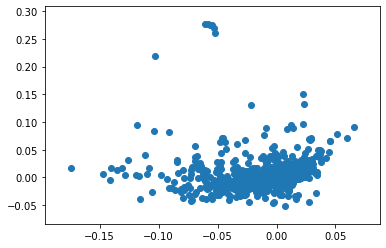

In [25]:
#Run PCA to reduce userXratings matrix to 2-dimensions

rating_vec_test_TRANS = np.array(rating_mat_noNAN).T
e_values, e_vectors, d1, d2 = run_pca(rating_vec_test_TRANS)
plt.scatter(e_vectors[:,0], e_vectors[:,1])

In [26]:
#user correlation testing

#df = pd.DataFrame(rating_mat_noNAN[:300].T)
#cor = df.corr()
#s = cor.unstack()
#so = s.sort_values(kind="quicksort")
#so = pd.DataFrame(so)
#so[so != 1].dropna()

Text(0, 0.5, 'PC2')

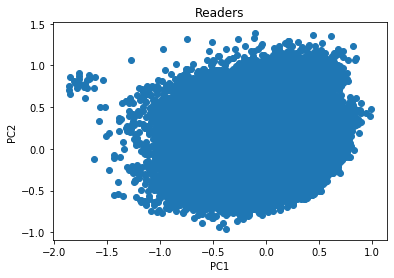

In [27]:
#Plot of the reduced dimensions of the userXratings matrix

fig, ax = plt.subplots()
ax.scatter(d1, d2)

plt.title('Readers')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [20]:
from scipy.spatial.distance import pdist, squareform, cosine
from scipy.spatial import distance_matrix
import random

#users = np.stack((d1, d2), axis=1)
#rating_sum = np.sum(rating_mat_noNAN, axis=1)
#rating_sum.mean()
df_users = pd.DataFrame(rating_mat_noNAN)
#df_users.head()

In [21]:
#Memory issue with m x m pairwaise distance matrix.
#About half of the dataset includes users with ratings summing to over 400.
#Mean for sum of ratings per user is 402

df_users_HIGHratings = df_users[df_users.sum(axis=1) > 400]

In [22]:
print("Users with Ratings Summing to Over 400:")
display(df_users_HIGHratings.head())
print("Users with Ratings Summing to Over 400 Shape:")
print(df_users_HIGHratings.shape)

Users with Ratings Summing to Over 400:


,0,1,2,3,4,5,6,7,8,9,...,6805,6806,6807,6808,6809,6810,6811,6812,6813,6814
0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,5.0,0.0,4.0,4.0,0.0,4.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4.0,4.0,4.0,0.0,5.0,0.0,0.0,0.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Users with Ratings Summing to Over 400 Shape:
(26279, 6815)


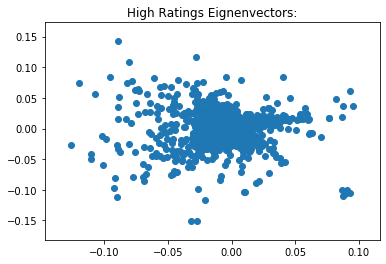

In [23]:
#Running PCA again on reduced userXratings matrix

rating_vec_test_TRANS = np.array(df_users_HIGHratings).T
e_values, e_vectors, d1, d2 = run_pca(rating_vec_test_TRANS)

plt.scatter(e_vectors[:,0], e_vectors[:,1])
plt.title("High Ratings Eignenvectors:")
plt.show()

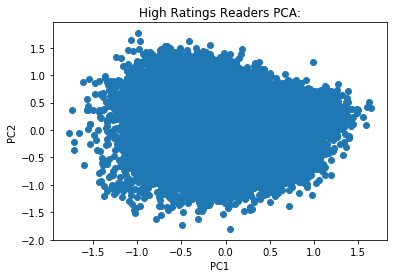

In [24]:
fig, ax = plt.subplots()
ax.scatter(d1, d2)

plt.title('High Ratings Readers PCA:')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [25]:
#Building distance matrix with reduced dimensions
users = np.stack((d1, d2), axis=1)
dist = squareform(pdist(users))

In [52]:
#generate random user_id within the range of the smaller matrix for distance testing
user_id = random.randint(0, 26279)

#OR

#enter user_id index to search within high ratings matrix (i.e. 0 is the first entry(ratings user_id: 1), 1 is the second entry(ratings user_id: 4), etc.)
user_id = 600
#user_id = 26277   590

print("Example Input:")
print(user_id)
print("Example Corresponding User-ID:")
new_user_id = df_users_HIGHratings.index[user_id]
ratings_user_id = new_user_id+1 #zero-indexed while original dataset isn't
print(ratings_user_id) 
print("Example User Ratings:")
display(df_users.loc[[df_users_HIGHratings.index[user_id]]])

#find 5 closest users
top_5 = np.sort(dist[user_id])[1:6]

#Get user ids in condensed matrix
similar_users = []
for distance in top_5:
    similar_users.append(np.where(dist[user_id] == distance))
    
#use above indices to get user_ids from full matrix
similar_user_ids = []
for idx in similar_users:
    similar_user_ids.append(df_users_HIGHratings.index[idx][0])

#build dataframe with top 5 similar users and book ratings
similar_ratings = df_users.loc[similar_user_ids]
print("Top 5 Similar Users and Their Book Ratings:")
display(similar_ratings)

Example Input:
600
Example Corresponding User-ID:
1346
Example User Ratings:


,0,1,2,3,4,5,6,7,8,9,...,6805,6806,6807,6808,6809,6810,6811,6812,6813,6814
1345,0.0,5.0,0.0,5.0,0.0,0.0,0.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Top 5 Similar Users and Their Book Ratings:


,0,1,2,3,4,5,6,7,8,9,...,6805,6806,6807,6808,6809,6810,6811,6812,6813,6814
30793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13457,0.0,4.0,1.0,5.0,4.0,0.0,0.0,5.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2662,0.0,5.0,0.0,5.0,5.0,0.0,3.0,5.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36706,0.0,0.0,0.0,5.0,5.0,0.0,4.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34638,4.0,5.0,0.0,5.0,5.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
## Example User's Highest Rated Books:
print("User " + str(ratings_user_id) + "'s Top Highest Rated Books:")
example_top_ratings = df_users.loc[new_user_id].sort_values(ascending = False)
count5 = 0
for i in example_top_ratings:
    if i == 5:
        count5+=1
if count5 >0:
    example_top_ratings = example_top_ratings.head(count5).index.sort_values()
if count5 >10:
    print("*User has more than 10 books rated 5-stars, has:", count5)
if count5 == 0:
    print("*User has no 5-star ratings")
for i in example_top_ratings[:10]:
    display(books[books.book_id == i+1][['book_id', 'title', 'original_title','authors', 'original_publication_year', 'average_rating', 'ratings_count']])

User 1346's Top Highest Rated Books:
*User has more than 10 books rated 5-stars, has: 67


,book_id,title,original_title,authors,original_publication_year,average_rating,ratings_count
1,2,Harry Potter and the Sorcerer's Stone (Harry P...,Harry Potter and the Philosopher's Stone,"J.K. Rowling, Mary GrandPré",1997.0,4.44,4602479


,book_id,title,original_title,authors,original_publication_year,average_rating,ratings_count
3,4,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,1960.0,4.25,3198671


,book_id,title,original_title,authors,original_publication_year,average_rating,ratings_count
9,10,Pride and Prejudice,Pride and Prejudice,Jane Austen,1813.0,4.24,2035490


,book_id,title,original_title,authors,original_publication_year,average_rating,ratings_count
17,18,Harry Potter and the Prisoner of Azkaban (Harr...,Harry Potter and the Prisoner of Azkaban,"J.K. Rowling, Mary GrandPré, Rufus Beck",1999.0,4.53,1832823


,book_id,title,original_title,authors,original_publication_year,average_rating,ratings_count
18,19,The Fellowship of the Ring (The Lord of the Ri...,The Fellowship of the Ring,J.R.R. Tolkien,1954.0,4.34,1766803


,book_id,title,original_title,authors,original_publication_year,average_rating,ratings_count
20,21,Harry Potter and the Order of the Phoenix (Har...,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré",2003.0,4.46,1735368


,book_id,title,original_title,authors,original_publication_year,average_rating,ratings_count
22,23,Harry Potter and the Chamber of Secrets (Harry...,Harry Potter and the Chamber of Secrets,"J.K. Rowling, Mary GrandPré",1998.0,4.37,1779331


,book_id,title,original_title,authors,original_publication_year,average_rating,ratings_count
23,24,Harry Potter and the Goblet of Fire (Harry Pot...,Harry Potter and the Goblet of Fire,"J.K. Rowling, Mary GrandPré",2000.0,4.53,1753043


,book_id,title,original_title,authors,original_publication_year,average_rating,ratings_count
24,25,Harry Potter and the Deathly Hallows (Harry Po...,Harry Potter and the Deathly Hallows,"J.K. Rowling, Mary GrandPré",2007.0,4.61,1746574


,book_id,title,original_title,authors,original_publication_year,average_rating,ratings_count
26,27,Harry Potter and the Half-Blood Prince (Harry ...,Harry Potter and the Half-Blood Prince,"J.K. Rowling, Mary GrandPré",2005.0,4.54,1678823


In [59]:
#For a specific user, this shows the top ten rated books 
#of the top 10 most similar users
#That have not been rated by the inquiring user.

best_books = similar_ratings.sum().sort_values(ascending=False)
top_10_by_users = []
for book_id in best_books.index:
    if df_users.loc[new_user_id][book_id] > 0:
        continue
    else:
        top_10_by_users.append(book_id)
        if len(top_10_by_users) == 10:
            break
print("User "+ str(ratings_user_id) + "'s Top Ten Recommendations Based on Similar Users:")            
for i in range(10):
        print("--- #", i+1, "---")
        display(books.loc[[top_10_by_users[i]]][['book_id', 'title', 'original_title','authors', 'original_publication_year', 'average_rating', 'ratings_count']])

User 1346's Top Ten Recommendations Based on Similar Users:
--- # 1 ---


,book_id,title,original_title,authors,original_publication_year,average_rating,ratings_count
31,32,Of Mice and Men,Of Mice and Men,John Steinbeck,1937.0,3.84,1467496


--- # 2 ---


,book_id,title,original_title,authors,original_publication_year,average_rating,ratings_count
4,5,The Great Gatsby,The Great Gatsby,F. Scott Fitzgerald,1925.0,3.89,2683664


--- # 3 ---


,book_id,title,original_title,authors,original_publication_year,average_rating,ratings_count
27,28,Lord of the Flies,Lord of the Flies,William Golding,1954.0,3.64,1605019


--- # 4 ---


,book_id,title,original_title,authors,original_publication_year,average_rating,ratings_count
126,127,The Tipping Point: How Little Things Can Make ...,The Tipping Point: How Little Things Can Make ...,Malcolm Gladwell,2000.0,3.92,490504


--- # 5 ---


,book_id,title,original_title,authors,original_publication_year,average_rating,ratings_count
12,13,1984,Nineteen Eighty-Four,"George Orwell, Erich Fromm, Celâl Üster",1949.0,4.14,1956832


--- # 6 ---


,book_id,title,original_title,authors,original_publication_year,average_rating,ratings_count
181,182,"Beautiful Creatures (Caster Chronicles, #1)",Beautiful Creatures,"Kami Garcia, Margaret Stohl",2009.0,3.76,436093


--- # 7 ---


,book_id,title,original_title,authors,original_publication_year,average_rating,ratings_count
82,83,A Tale of Two Cities,A Tale of Two Cities,"Charles Dickens, Richard Maxwell, Hablot Knigh...",1859.0,3.81,637412


--- # 8 ---


,book_id,title,original_title,authors,original_publication_year,average_rating,ratings_count
151,152,Dear John,Dear John,Nicholas Sparks,2006.0,4.01,441062


--- # 9 ---


,book_id,title,original_title,authors,original_publication_year,average_rating,ratings_count
127,128,Steve Jobs,Steve Jobs,Walter Isaacson,2011.0,4.09,560715


--- # 10 ---


,book_id,title,original_title,authors,original_publication_year,average_rating,ratings_count
37,38,The Time Traveler's Wife,The Time Traveler's Wife,Audrey Niffenegger,2003.0,3.95,746287


In [60]:
#Shows the books marked to read by the user
to_read_user_df = to_read[to_read.user_id == ratings_user_id]
print("Books User Marked 'to-read':")
to_read_user_df.head()

Books User Marked 'to-read':


,user_id,book_id,title,authors
758,1346,3187,No One Belongs Here More Than You,Miranda July
759,1346,1378,The Professor and the Madman: A Tale of Murder...,Simon Winchester
760,1346,1005,White Teeth,Zadie Smith
761,1346,424,The Name of the Rose,"Umberto Eco, William Weaver, Seán Barrett"
10660,1346,5,The Great Gatsby,F. Scott Fitzgerald


In [61]:
#Top 10 reccomended books from above in a dataframe
top_10_rec_users_df = books.loc[top_10_by_users][['book_id', 'title', 'original_title','authors', 'original_publication_year', 'average_rating', 'ratings_count']]
print("User's Top Ten Recommended Books:")
display(top_10_rec_users_df)

User's Top Ten Recommended Books:


,book_id,title,original_title,authors,original_publication_year,average_rating,ratings_count
31,32,Of Mice and Men,Of Mice and Men,John Steinbeck,1937.0,3.84,1467496
4,5,The Great Gatsby,The Great Gatsby,F. Scott Fitzgerald,1925.0,3.89,2683664
27,28,Lord of the Flies,Lord of the Flies,William Golding,1954.0,3.64,1605019
126,127,The Tipping Point: How Little Things Can Make ...,The Tipping Point: How Little Things Can Make ...,Malcolm Gladwell,2000.0,3.92,490504
12,13,1984,Nineteen Eighty-Four,"George Orwell, Erich Fromm, Celâl Üster",1949.0,4.14,1956832
181,182,"Beautiful Creatures (Caster Chronicles, #1)",Beautiful Creatures,"Kami Garcia, Margaret Stohl",2009.0,3.76,436093
82,83,A Tale of Two Cities,A Tale of Two Cities,"Charles Dickens, Richard Maxwell, Hablot Knigh...",1859.0,3.81,637412
151,152,Dear John,Dear John,Nicholas Sparks,2006.0,4.01,441062
127,128,Steve Jobs,Steve Jobs,Walter Isaacson,2011.0,4.09,560715
37,38,The Time Traveler's Wife,The Time Traveler's Wife,Audrey Niffenegger,2003.0,3.95,746287


In [62]:
#Do the reccomended books appear in the user's "to_read" list?
print("Do the reccomended books appear in the user's 'to_read' list?")
count_t = 0
count_f = 0
for i in to_read_user_df.title.isin(top_10_rec_users_df.title):
    if i == True:
        display(i)
        count_t += 1
    elif i == False:
        count_f += 1
if len(to_read_user_df) == 0:
    print("--No books in user's 'to-read' list--")
elif len(to_read_user_df) > 0:
    print("True %:", count_t/len(to_read_user_df.title.isin(top_10_rec_users_df.title))*100)
    print("False %:", count_f/len(to_read_user_df.title.isin(top_10_rec_users_df.title))*100)
    display(to_read_user_df.title.isin(top_10_rec_users_df.title))

Do the reccomended books appear in the user's 'to_read' list?


True

True %: 14.285714285714285
False %: 85.71428571428571


758      False
759      False
760      False
761      False
10660     True
10661    False
10662    False
Name: title, dtype: bool

In [48]:
def get_rec(b_id= None):
    ## Search Book for book_id
    if b_id == None:
        num_found = search_book()
        for i in range(10):
            if num_found == 0: ## If can't find book, 10 more attempts
                print("You have", 10-i, "more search attempts")
                num_found = search_book()
            else:
                break
        b_id = input("Enter Book_id...[Type 'exit' to escape]") #to escape search
        if b_id == 'exit':
            print("Escaped Search")
            return
        else:
            b_id = int(b_id)
    ## Get Most Correlated Books list from rating matrix
    book1_ratings = rating_mat[b_id]
    most_corr = rating_mat.corrwith(book1_ratings).sort_values(ascending= False)
    most_corr = np.asarray(most_corr.index)

    ## Create similarity scores for genres
    scores = {}
    genres_to_match = list(top_genres[top_genres.book_id == b_id].genre)
    for i in most_corr:
        if i == b_id:
            continue
        elif i != b_id:
            lst = list(top_genres[top_genres.book_id == i].genre)
            count = 0
            for x in lst:
                if x not in genres_to_match:
                    continue
                elif x in genres_to_match:
                    count += 1
            scores[i] = count/len(genres_to_match)

    ## Keep Scores over threshold:
    rec_books = []
    for k,v in scores.items():
        if v >= .7:
            rec_books.append(k)
        elif v < .7:
            continue

    ## Print Book Title:
    title = books[books.book_id == b_id].title.values
    for i in title:
        print(i, "Recommendations:")

    ## Make sure author doesn't appear more than once:
    author_lst = []
    author_lst.append(books[books.book_id == rec_books[0]].authors.to_string(header = False, index = False))
    final = []
    for i in rec_books[1:]:
        if books[books.book_id == i].authors.to_string(header = False, index = False) in author_lst:
            continue
        elif books[books.book_id == i].authors.to_string(header = False, index = False) not in author_lst:
            final.append(i)
            author_lst.append(books[books.book_id == i].authors.to_string(header = False, index = False))

    ## Display Top Ten Results:
    for i in range(10):
        print("--- #", i+1, "---")
        display(books[books.book_id == final[i]][['book_id', 'title', 'original_title','authors', 'original_publication_year', 'average_rating', 'ratings_count']])

    return #final[:10]

### Results:

In [174]:
## Run to test Recommendation System:


#get_rec() ##can type in book_id or leave blank and search by book title

Twilight (Twilight, #1) Recommendations:
--- # 1 ---


,book_id,title,original_title,authors,original_publication_year,average_rating,ratings_count
2020,2021,"The Twilight Collection (Twilight, #1-3)","The Twilight Collection (Twilight, #1-3)",Stephenie Meyer,2007.0,3.78,42361


--- # 2 ---


,book_id,title,original_title,authors,original_publication_year,average_rating,ratings_count
1108,1109,New Moon: The Complete Illustrated Movie Compa...,New Moon: The Complete Illustrated Movie Compa...,Mark Cotta Vaz,2009.0,4.34,82399


--- # 3 ---


,book_id,title,original_title,authors,original_publication_year,average_rating,ratings_count
9555,9556,"Kitty Goes to Washington (Kitty Norville, #2)",Kitty Goes to Washington,Carrie Vaughn,2006.0,3.87,16725


--- # 4 ---


,book_id,title,original_title,authors,original_publication_year,average_rating,ratings_count
4818,4819,"Airhead (Airhead, #1)",Airhead,Meg Cabot,2008.0,3.77,32457


--- # 5 ---


,book_id,title,original_title,authors,original_publication_year,average_rating,ratings_count
3082,3083,"Nightfall (The Vampire Diaries: The Return, #1)",The Return: Nightfall,L.J. Smith,2009.0,3.57,40213


--- # 6 ---


,book_id,title,original_title,authors,original_publication_year,average_rating,ratings_count
245,246,"Marked (House of Night, #1)",Marked,"P.C. Cast, Kristin Cast",2007.0,3.79,360044


--- # 7 ---


,book_id,title,original_title,authors,original_publication_year,average_rating,ratings_count
5199,5200,"Bad Girls Don't Die (Bad Girls Don't Die, #1)",Bad Girls Don't Die,Katie Alender,2009.0,4.07,18862


--- # 8 ---


,book_id,title,original_title,authors,original_publication_year,average_rating,ratings_count
209,210,"Vampire Academy (Vampire Academy, #1)",NaN,Richelle Mead,2007.0,4.14,248283


--- # 9 ---


,book_id,title,original_title,authors,original_publication_year,average_rating,ratings_count
1125,1126,"Vampire Knight, Vol. 1 (Vampire Knight, #1)",ヴァンパイア騎士 1,"Matsuri Hino, Tomo Kimura",2005.0,4.1,89733


--- # 10 ---


,book_id,title,original_title,authors,original_publication_year,average_rating,ratings_count
4469,4470,"Poison Princess (The Arcana Chronicles, #1)",Poison Princess,Kresley Cole,2012.0,4.14,25679
